In [1]:
curr_dir =  '/user_data/vayzenbe/GitHub_Repos/LiMA'
import sys
sys.path.insert(0, '/user_data/vayzenbe/GitHub_Repos/flownet2-pytorch')
sys.path.insert(0, curr_dir)

import os, argparse
from collections import OrderedDict

import torch.nn as nn
import torchvision


from torchvision import datasets

import numpy as np
import torch
from LoadImagePairs import LoadImagePairs
from torchvision import transforms

In [2]:

out_dir = '/user_data/vayzenbe/flow_test'
model = torch.load(f'{curr_dir}/Weights/flownet2S.pt')

checkpoint = torch.load(f'{curr_dir}/Weights/FlowNet2-S_checkpoint.pth.tar')
model.load_state_dict(checkpoint['state_dict'])
model.eval()

hab_dataset = LoadImagePairs(f'{curr_dir}/Frames/Figure_23_Bulge')
trainloader = torch.utils.data.DataLoader(hab_dataset, batch_size=10, shuffle=False, num_workers = 2, pin_memory=True)
n = 1
for data in trainloader:
    #print(data)
    flo,deconv,conv  = model(data[0][0])
    break


i run the flownet model in models


/home/vayzenbe/anaconda3/envs/flownet/lib/python3.9/site-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


In [5]:
conv.shape

torch.Size([10, 128, 80, 80])

In [4]:
flo.shape

torch.Size([10, 2, 320, 320])

In [37]:
out2 = decode_from_deconv(out)

In [5]:

decode_from_conv = nn.Sequential(nn.MaxPool2d(kernel_size=3, stride=2, padding=1), nn.AdaptiveAvgPool2d(1),nn.ReLU(), nn.ConvTranspose2d(1024, 2, 224))
decode_from_deconv = nn.Sequential(nn.Conv2d(2,1024,kernel_size=3, stride=2), nn.ReLU(),nn.MaxPool2d(kernel_size=3, stride=2, padding=1), nn.AdaptiveAvgPool2d(1),nn.ReLU(), nn.ConvTranspose2d(1024, 2, 224))


In [6]:
out2 = decode_from_conv(conv)

In [2]:
'''code in here to generate samples'''

curr_dir =  '/user_data/vayzenbe/GitHub_Repos/LiMA'
import sys
sys.path.insert(0, '/user_data/vayzenbe/GitHub_Repos/flownet2-pytorch')
sys.path.insert(0, curr_dir)
from LoadImagePairs import LoadImagePairs
import torch
from torchvision import transforms
from utils import flow_utils
out_dir = '/user_data/vayzenbe/flow_test'
model = torch.load(f'{curr_dir}/Weights/flownet2S.pt')

checkpoint = torch.load(f'{curr_dir}/Weights/FlowNet2-S_checkpoint.pth.tar')
model.load_state_dict(checkpoint['state_dict'])
model.eval()

hab_dataset = LoadImagePairs(f'{curr_dir}/Frames/Figure_23_Bulge')
trainloader = torch.utils.data.DataLoader(hab_dataset, batch_size=10, shuffle=False, num_workers = 2, pin_memory=True)
n = 1
for data in trainloader:
    #print(data)
    flo,deconv,conv = model(data[0][0])
    _pflow = flo[0,...].data.cpu().numpy().transpose(1, 2, 0)
    flow_utils.visulize_flow_file(_pflow,f'{out_dir}/im_{n}.jpg',True)
    n +=1
    

/home/vayzenbe/anaconda3/envs/flownet/lib/python3.9/site-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


In [5]:
conv.shape

torch.Size([1, 128, 80, 80])

In [44]:

model = model.cuda()
summary(model, (3, 2, 320, 320))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]          18,880
         LeakyReLU-2         [-1, 64, 160, 160]               0
            Conv2d-3          [-1, 128, 80, 80]         204,928
         LeakyReLU-4          [-1, 128, 80, 80]               0
            Conv2d-5          [-1, 256, 40, 40]         819,456
         LeakyReLU-6          [-1, 256, 40, 40]               0
            Conv2d-7          [-1, 256, 40, 40]         590,080
         LeakyReLU-8          [-1, 256, 40, 40]               0
            Conv2d-9          [-1, 512, 20, 20]       1,180,160
        LeakyReLU-10          [-1, 512, 20, 20]               0
           Conv2d-11          [-1, 512, 20, 20]       2,359,808
        LeakyReLU-12          [-1, 512, 20, 20]               0
           Conv2d-13          [-1, 512, 10, 10]       2,359,808
        LeakyReLU-14          [-1, 512,

/home/vayzenbe/anaconda3/envs/flownet/lib/python3.9/site-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


ValueError: x and y can be no greater than 2-D, but have shapes (320,) and (320, 320, 2)

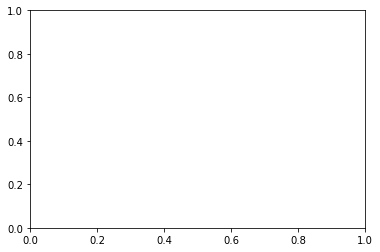

In [11]:
import matplotlib.pyplot as plt
plt.plot(_pflow)

In [10]:

transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])])
hab_dataset = LoadImagePairs(f'{curr_dir}/Frames/Figure_23_Bulge', transform=transform)
trainloader = torch.utils.data.DataLoader(hab_dataset, batch_size=1, shuffle=True, num_workers = 2, pin_memory=True)
for data in trainloader:
    print(data)
    #out = model(data)
    break

tensor([[[[[-0.0801, -0.0801, -0.0801,  ..., -0.0801, -0.0801, -0.0801],
           [-0.0801, -0.0801, -0.0801,  ..., -0.0801, -0.0801, -0.0801],
           [-0.0801, -0.0801, -0.0801,  ..., -0.0801, -0.0801, -0.0801],
           ...,
           [-0.0801, -0.0801, -0.0801,  ..., -0.0801, -0.0801, -0.0801],
           [-0.0801, -0.0801, -0.0801,  ..., -0.0801, -0.0801, -0.0801],
           [-0.0801, -0.0801, -0.0801,  ..., -0.0801, -0.0801, -0.0801]],

          [[ 0.0476,  0.0476,  0.0476,  ...,  0.0476,  0.0476,  0.0476],
           [ 0.0476,  0.0476,  0.0476,  ...,  0.0476,  0.0476,  0.0476],
           [ 0.0476,  0.0476,  0.0476,  ...,  0.0476,  0.0476,  0.0476],
           ...,
           [ 0.0476,  0.0476,  0.0476,  ...,  0.0476,  0.0476,  0.0476],
           [ 0.0476,  0.0476,  0.0476,  ...,  0.0476,  0.0476,  0.0476],
           [ 0.0476,  0.0476,  0.0476,  ...,  0.0476,  0.0476,  0.0476]],

          [[ 0.2696,  0.2696,  0.2696,  ...,  0.2696,  0.2696,  0.2696],
           [ 0.

In [11]:
data.shape

torch.Size([1, 1, 6, 224, 224])

ValueError: axes don't match array

In [12]:

model = torch.load(f'{curr_dir}/Weights/flownet2S.pt')
checkpoint = torch.load(f'{curr_dir}/Weights/FlowNet2-S_checkpoint.pth.tar')
model.load_state_dict(checkpoint['state_dict'])
model.eval()

FlowNet2S(
  (conv1): Sequential(
    (0): Conv2d(6, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): LeakyReLU(negative_slope=0.1, inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): LeakyReLU(negative_slope=0.1, inplace=True)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): LeakyReLU(negative_slope=0.1, inplace=True)
  )
  (conv3_1): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.1, inplace=True)
  )
  (conv4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.1, inplace=True)
  )
  (conv4_1): Sequential(
    (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.1, inplace=True)
  )
  (conv5): Sequential(
    (0): Conv2d(512, 512

In [3]:
hab_dataset = LoadImagePairs(f'{curr_dir}/Frames/Figure_23_Bulge', transform=transform)
trainloader = torch.utils.data.DataLoader(hab_dataset, batch_size=10, shuffle=True, num_workers = 2, pin_memory=True)
